# Module 11: Automated Machine Learning 

For module 11 I continued my work on the loan default dataset. This week I applied the Random Forest model to the dataset before moving on to fit the SHAP Values model. 

Report outline:
- Import of the dataset 
- Handling the missing data points
- Specifying the target variable and the predictors to use in the creation of a model
- Fitting Random Forest model 
- Determing feature importance 
- Finding the shap values 
- Dependency plots
- Summary plots
- Force plots for individual observations
- Fitting models with the SHAP values

In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
import matplotlib.pyplot as plt
import os 
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer 
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer

In [2]:
os.chdir('C:/Users/rdiml/Documents/')

In [3]:
mortgage = pd.read_csv("XYZloan_default_selected_vars.csv")
mortgage.head()

,Unnamed: 0,Unnamed: 0.1,id,loan_default,AP001,AP002,AP003,AP004,AP005,AP006,...,CD162,CD164,CD166,CD167,CD169,CD170,CD172,CD173,MB005,MB007
0,0,1,1,1,31,2,1,12,2017/7/6 10:21,ios,...,13.0,13.0,0.0,0.0,1449.0,1449.0,2249.0,2249.0,7.0,IPHONE7
1,1,2,2,0,27,1,1,12,2017/4/6 12:51,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB
2,2,3,3,0,33,1,4,12,2017/7/1 14:11,h5,...,3.0,2.0,33.0,0.0,33.0,0.0,143.0,110.0,8.0,WEB
3,3,4,4,0,34,2,4,12,2017/7/7 10:10,android,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,OPPO
4,4,5,5,0,47,2,1,12,2017/7/6 14:37,h5,...,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,-99.0,NaN,WEB


In [4]:
mortgage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 89 columns):
Unnamed: 0      80000 non-null int64
Unnamed: 0.1    80000 non-null int64
id              80000 non-null int64
loan_default    80000 non-null int64
AP001           80000 non-null int64
AP002           80000 non-null int64
AP003           80000 non-null int64
AP004           80000 non-null int64
AP005           80000 non-null object
AP006           80000 non-null object
AP007           80000 non-null int64
AP008           80000 non-null int64
AP009           80000 non-null int64
TD001           80000 non-null int64
TD002           80000 non-null int64
TD005           80000 non-null int64
TD006           80000 non-null int64
TD009           80000 non-null int64
TD010           80000 non-null int64
TD013           80000 non-null int64
TD014           80000 non-null int64
TD015           80000 non-null int64
TD022           60402 non-null float64
TD023           72337 non-null float

In [5]:
mortgage = mortgage.drop(['AP005','AP006','MB007'], axis=1)

In [6]:
mortgage = mortgage.apply(lambda x: x.fillna(x.mean()), axis=0)

In [7]:
Y = mortgage['loan_default']
X = mortgage[['AP001','AP002','AP003','AP004','AP007','AP008','AP009',
             'TD001','TD002','TD005','TD006','TD009','TD010','TD013','TD014','TD015','TD022',
             'CR004','CR005','CR009','CR012','CR015','CR017','CR018','CR019'
             ]]


In [8]:
mortgage.isnull().sum(axis=0)

Unnamed: 0      0
Unnamed: 0.1    0
id              0
loan_default    0
AP001           0
AP002           0
AP003           0
AP004           0
AP007           0
AP008           0
AP009           0
TD001           0
TD002           0
TD005           0
TD006           0
TD009           0
TD010           0
TD013           0
TD014           0
TD015           0
TD022           0
TD023           0
TD024           0
TD025           0
TD026           0
TD027           0
TD028           0
TD029           0
TD044           0
TD048           0
               ..
CD106           0
CD107           0
CD108           0
CD113           0
CD114           0
CD115           0
CD117           0
CD118           0
CD120           0
CD121           0
CD123           0
CD130           0
CD131           0
CD132           0
CD133           0
CD135           0
CD136           0
CD137           0
CD152           0
CD153           0
CD160           0
CD162           0
CD164           0
CD166           0
CD167     

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [10]:
model = RandomForestRegressor(max_depth=6, random_state=0, n_estimators=10)
model.fit(X_train, Y_train)  
print(model.feature_importances_)

[0.01148229 0.00379734 0.17037012 0.18219769 0.00639664 0.00115942
 0.00169269 0.01166866 0.00473696 0.05614471 0.01783594 0.04737453
 0.0106508  0.33944795 0.01214358 0.00685635 0.00637449 0.00566796
 0.00418907 0.01991717 0.         0.07130655 0.00276351 0.00163909
 0.00418649]


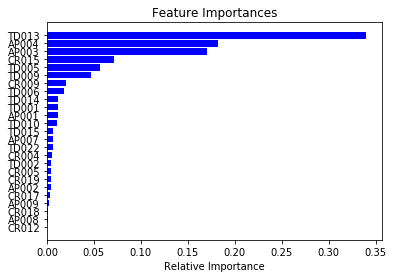

In [11]:
importances = model.feature_importances_
indices = np.argsort(importances)

features = X_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
#plt.figure(figsize=(40,10))
plt.show()

## SHAP values

In [12]:
import shap

In [13]:
shap_values = shap.TreeExplainer(model).shap_values(X_train)

## Summary plot

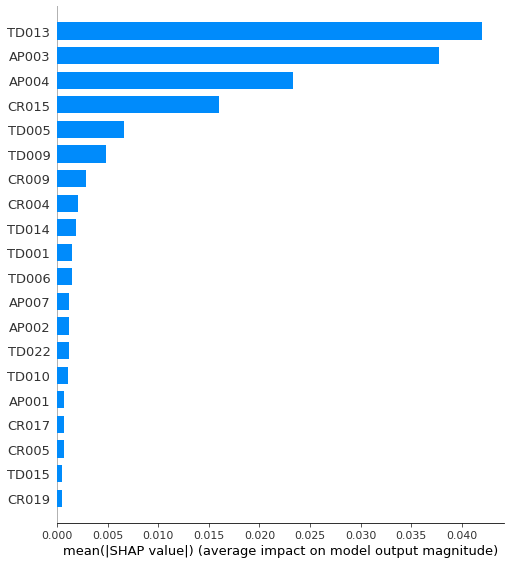

In [14]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

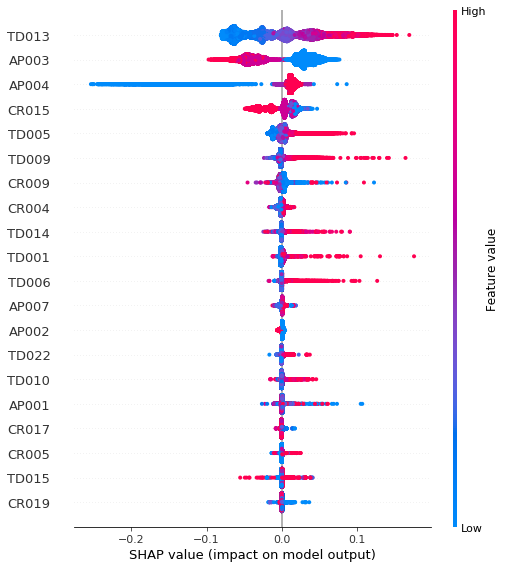

In [15]:
shap.summary_plot(shap_values, X_train)

The most important variable characteristics in the prediction of loan default are:
- high TD013 
- high AP003
- low AP004
- high CR015
- high TD005
- high TD009
- low CR009
- low CR004
- high TD014
- high TD001
- high TD006
- high AP007
- low AP002
- high TD022
- high TD010
- low AP001 
- high CR017
- high CR005
- high TD015
- low CR019

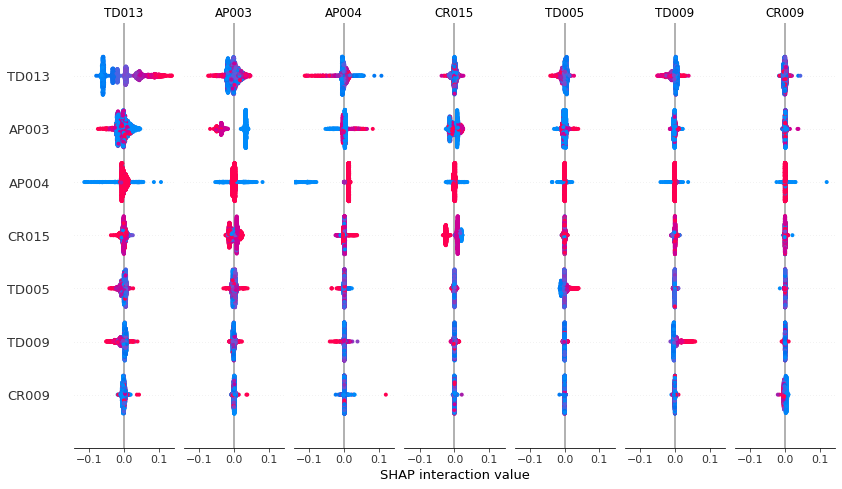

In [20]:
shap_interaction_values = shap.TreeExplainer(model).shap_interaction_values(X_train.iloc[:2000,:])
shap.summary_plot(shap_interaction_values, X_train.iloc[:2000,:])

## Dependence plot

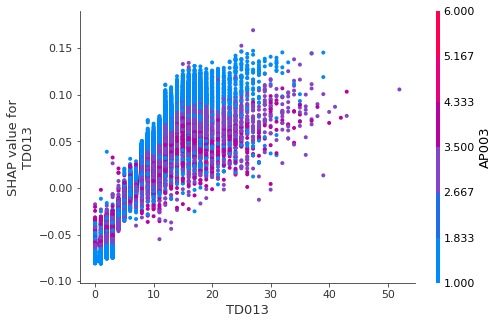

In [16]:
shap.dependence_plot("TD013", shap_values, X_train)

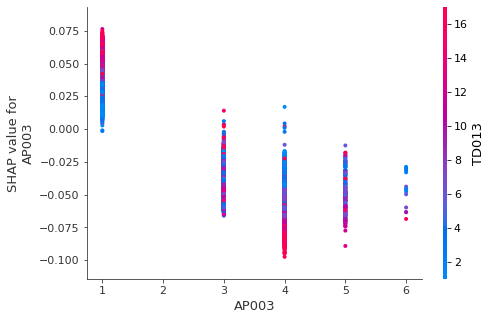

In [17]:
shap.dependence_plot("AP003", shap_values, X_train)

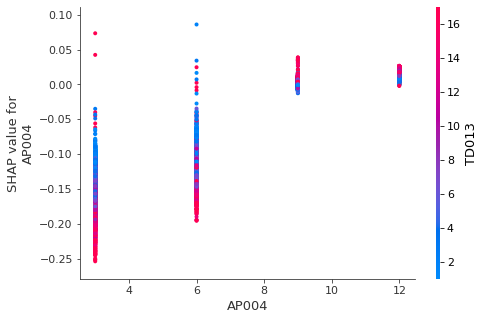

In [18]:
shap.dependence_plot("AP004", shap_values, X_train)

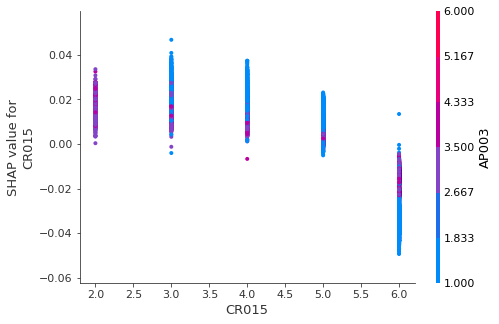

In [19]:
shap.dependence_plot("CR015", shap_values, X_train)

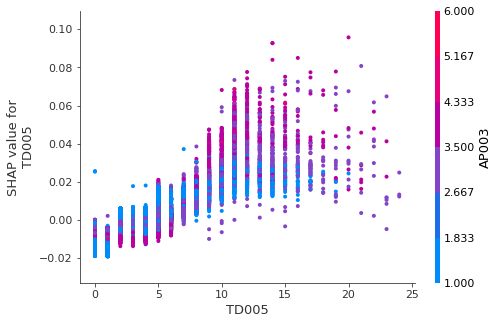

In [30]:
shap.dependence_plot("TD005", shap_values, X_train)

In [21]:
X_output = X_test.copy()
X_output.loc[:,'predict'] = np.round(model.predict(X_output),2)

random_picks = np.arange(1,330,50)
S = X_output.iloc[random_picks]
S

,AP001,AP002,AP003,AP004,AP007,AP008,AP009,TD001,TD002,TD005,...,TD022,CR004,CR005,CR009,CR012,CR015,CR017,CR018,CR019,predict
3509,25,1,3,12,4,4,1,2,1,5,...,15.000000,2,1,17387,0,4,1,0,2,0.21
5668,30,1,1,12,4,4,1,1,1,3,...,10.000000,3,1,63900,0,5,8,5,8,0.26
55849,47,1,1,12,4,4,1,5,0,5,...,30.000000,4,3,13500,0,6,8,8,12,0.19
29484,27,1,3,12,2,2,1,2,1,5,...,15.000000,3,1,37202,0,6,7,7,7,0.21
17237,38,1,1,12,5,4,0,0,0,0,...,17.120294,1,1,0,0,5,5,4,5,0.15
31155,27,1,3,12,3,3,1,6,3,8,...,30.000000,4,5,20135,0,6,7,4,5,0.23
53868,29,2,4,12,3,3,1,3,0,6,...,15.000000,4,4,40000,0,6,7,7,5,0.17


## Initializing Java script

In [22]:
shap.initjs()

In [23]:
def shap_plot(j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [24]:
X_train.mean()

AP001       31.705672
AP002        1.322297
AP003        2.013187
AP004       11.234063
AP007        3.300219
AP008        3.114594
AP009        0.727969
TD001        1.994078
TD002        0.707766
TD005        3.602359
TD006        1.346375
TD009        5.422781
TD010        2.023453
TD013        6.823188
TD014        2.609453
TD015        0.720922
TD022       17.126971
CR004        2.508984
CR005        1.599359
CR009    35138.195359
CR012        0.000000
CR015        4.922906
CR017        5.230531
CR018        4.358562
CR019        6.190828
dtype: float64

In [25]:
Y_test.mean()

0.186375

In [26]:
shap_plot(0)

The shap plot is indicating that the top variable TD013 is pushing the prediction to the right/higher, while AP003 is pushing the prediction to the left or down

In [27]:
shap_plot(1)

In [28]:
shap_plot(2)

In [29]:
shap_plot(3)

## Support Vector Machine (SVM)

In [31]:
from sklearn import svm
svm = svm.SVC(gamma='scale',decision_function_shape='ovo')
svm.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
svm_explainer = shap.KernelExplainer(svm.predict,X_test)
svm_shap_values = svm_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(svm_shap_values, X_test)

In [ ]:
shap.dependence_plot("TD013", svm_shap_values, X_test)

In [ ]:
#plotting shap values for 5th observation
shap.force_plot(svm_explainer.expected_value,svm_shap_values[5,:], X_test.iloc[5,:])

In [ ]:
shap.force_plot(svm_explainer.expected_value, svm_shap_values, X_test)

## K Nearest Neighbors (KNN)

In [32]:
from sklearn import neighbors
n_neighbors = 15
knn = neighbors.KNeighborsClassifier(n_neighbors,weights='distance')
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='distance')

In [ ]:
knn_explainer = shap.KernelExplainer(knn.predict,X_test)
knn_shap_values = knn_explainer.shap_values(X_test)

In [ ]:
shap.summary_plot(knn_shap_values, X_test)

In [ ]:
shap.dependence_plot("alcohol", knn_shap_values, X_test)

In [ ]:
shap.force_plot(knn_explainer.expected_value,knn_shap_values[5,:], X_test.iloc[5,:])

In [ ]:
shap.force_plot(knn_explainer.expected_value, knn_shap_values, X_test)